In [1]:
from tqdm.auto import tqdm
from policy_runner import define_actions, define_policies, run_policies
import matplotlib.pyplot as plt
import numpy as np

In [2]:
actions = define_actions(10)

for action in actions:
    print(f"Action {action.name}: average reward = {action.average_reward}")

Action 1: average reward = -1.3211561862409242
Action 2: average reward = 0.25062189442838356
Action 3: average reward = -1.2349682178884387
Action 4: average reward = 1.2308633767817356
Action 5: average reward = 1.4062157051023758
Action 6: average reward = 0.17790716162278772
Action 7: average reward = -0.5609075309992974
Action 8: average reward = -1.4078575572192769
Action 9: average reward = 0.10711816835104036
Action 10: average reward = -2.5089392786748204


In [3]:
policies = define_policies(actions)
run_policies(policies, 10)

{'greedy r$_0$=0': array([ 0.47331552, -0.34353062, -0.99653463,  1.47264172,  1.9993921 ,
         1.29735003,  2.8869694 ,  1.2265027 ,  1.10136829,  1.42786719]),
 'greedy r$_0$=5': array([-1.82586109,  0.03493357,  0.76808044, -0.14898293,  0.1697973 ,
        -0.75064864,  0.59441264, -0.41246995, -0.8692432 ,  1.40459953]),
 'epsilon-greedy $\\epsilon$=0.1': array([ 1.38035305,  0.96194279, -0.68844962,  1.67302943,  1.8913718 ,
         0.39922086, -0.14124627, -0.83430036, -1.7786121 , -1.38596825]),
 'epsilon-greedy $\\epsilon$=0.01': array([-0.86372444, -0.02125604,  1.67517975,  1.69080431,  2.07971234,
         1.119189  , -0.21762538,  1.28780158,  0.81276927,  0.69490593]),
 'UCB c=2': array([ 1.75358978, -2.08825497, -0.52319116,  0.83509577, -0.65286608,
        -2.76633609, -1.52571149,  1.39725135,  0.12235465, -0.43616599])}

In [4]:
def average_runs(prev, new, idx):
    if prev is None:
        return new

    assert set(prev.keys()) == set(new.keys())
    for name, old_res in prev.items():
        prev[name] = old_res + (new[name] - old_res) / idx

    return prev


In [5]:
POLICY_RUN_STEPS = 1000
REPEAT = 2000

combined_results = None

for i in tqdm(range(REPEAT), desc="Evaluation iteration"):
    actions = define_actions(10)
    policies = define_policies(actions)
    new_results = run_policies(policies, POLICY_RUN_STEPS)
    combined_results = average_runs(combined_results, new_results, i)


Evaluation iteration:   0%|          | 0/2000 [00:00<?, ?it/s]

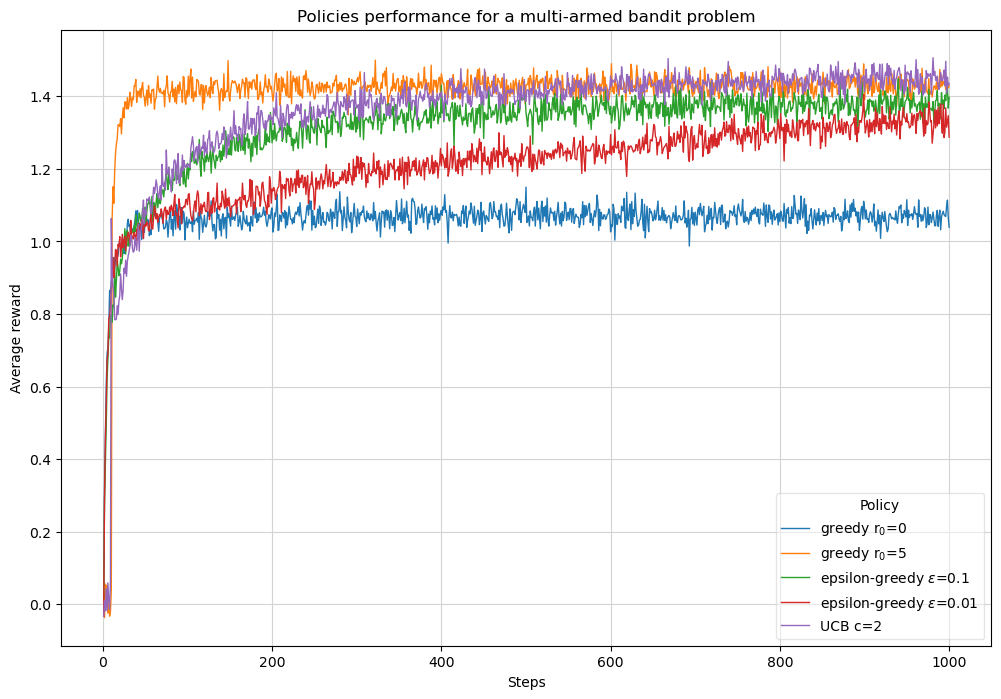

In [6]:
%matplotlib inline

fig, ax = plt.subplots(figsize=(12, 8))
ax.grid(color='lightgrey')
x = np.arange(POLICY_RUN_STEPS) + 1
for policy_name, policy_result in combined_results.items():
    ax.plot(x, policy_result, label=policy_name, lw=1)
ax.legend(title="Policy", fancybox=True, framealpha=0.5)
ax.set_ylabel("Average reward")
ax.set_xlabel("Steps")
_ = ax.set_title("Policies performance for a multi-armed bandit problem")